In [5]:
import pandas as pd


In [6]:
TB = pd.read_csv("https://github.com/SophonPlus/ChineseNlpCorpus/raw/master/datasets/waimai_10k/waimai_10k.csv")

In [7]:
TB.head()

,label,review
0,1,很快，好吃，味道足，量大
1,1,没有送水没有送水没有送水
2,1,非常快，态度好。
3,1,方便，快捷，味道可口，快递给力
4,1,菜味道很棒！送餐很及时！


In [8]:
import jieba

In [9]:
jieba.lcut(TB.review[0])

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/7w/2s3zqvjd16v316mkcp0jnv_w0000gn/T/jieba.cache
Loading model cost 0.650 seconds.
Prefix dict has been built successfully.


['很快', '，', '好吃', '，', '味道', '足', '，', '量', '大']

In [10]:
TB.review.apply(lambda x: jieba.lcut)

0        <bound method Tokenizer.lcut of <Tokenizer dic...
1        <bound method Tokenizer.lcut of <Tokenizer dic...
2        <bound method Tokenizer.lcut of <Tokenizer dic...
3        <bound method Tokenizer.lcut of <Tokenizer dic...
4        <bound method Tokenizer.lcut of <Tokenizer dic...
                               ...                        
11982    <bound method Tokenizer.lcut of <Tokenizer dic...
11983    <bound method Tokenizer.lcut of <Tokenizer dic...
11984    <bound method Tokenizer.lcut of <Tokenizer dic...
11985    <bound method Tokenizer.lcut of <Tokenizer dic...
11986    <bound method Tokenizer.lcut of <Tokenizer dic...
Name: review, Length: 11987, dtype: object

In [11]:
TB['text'] = TB.review.apply(lambda x: jieba.lcut(x))

In [12]:
TB.text.head()


0         [很快, ，, 好吃, ，, 味道, 足, ，, 量, 大]
1               [没有, 送水, 没有, 送水, 没有, 送水]
2                   [非常, 快, ，, 态度, 好, 。]
3    [方便, ，, 快捷, ，, 味道, 可口, ，, 快, 递给, 力]
4           [菜, 味道, 很棒, ！, 送餐, 很, 及时, ！]
Name: text, dtype: object

In [13]:
TB.head()

,label,review,text
0,1,很快，好吃，味道足，量大,"[很快, ，, 好吃, ，, 味道, 足, ，, 量, 大]"
1,1,没有送水没有送水没有送水,"[没有, 送水, 没有, 送水, 没有, 送水]"
2,1,非常快，态度好。,"[非常, 快, ，, 态度, 好, 。]"
3,1,方便，快捷，味道可口，快递给力,"[方便, ，, 快捷, ，, 味道, 可口, ，, 快, 递给, 力]"
4,1,菜味道很棒！送餐很及时！,"[菜, 味道, 很棒, ！, 送餐, 很, 及时, ！]"


In [14]:
from gensim.models import Word2Vec

In [15]:
myWord2Vec=Word2Vec(TB.text, size=250, iter=10, sg=1, min_count=1)

In [16]:
print(myWord2Vec)

Word2Vec(vocab=11008, size=250, alpha=0.025)


In [17]:
myWord2Vec.wv.vocab



{'很快': <gensim.models.keyedvectors.Vocab at 0x12618a040>,
 '，': <gensim.models.keyedvectors.Vocab at 0x119e1ea60>,
 '好吃': <gensim.models.keyedvectors.Vocab at 0x119e1e8e0>,
 '味道': <gensim.models.keyedvectors.Vocab at 0x119e1e280>,
 '足': <gensim.models.keyedvectors.Vocab at 0x119db1ee0>,
 '量': <gensim.models.keyedvectors.Vocab at 0x133a3e6a0>,
 '大': <gensim.models.keyedvectors.Vocab at 0x133aa9370>,
 '没有': <gensim.models.keyedvectors.Vocab at 0x133aa93d0>,
 '送水': <gensim.models.keyedvectors.Vocab at 0x133aa9430>,
 '非常': <gensim.models.keyedvectors.Vocab at 0x133aa9490>,
 '快': <gensim.models.keyedvectors.Vocab at 0x133aa94f0>,
 '态度': <gensim.models.keyedvectors.Vocab at 0x133aa9550>,
 '好': <gensim.models.keyedvectors.Vocab at 0x133aa95b0>,
 '。': <gensim.models.keyedvectors.Vocab at 0x133aa9610>,
 '方便': <gensim.models.keyedvectors.Vocab at 0x133aa9670>,
 '快捷': <gensim.models.keyedvectors.Vocab at 0x133aa96d0>,
 '可口': <gensim.models.keyedvectors.Vocab at 0x133aa9730>,
 '递给': <gensim.models

In [18]:
myWord2Vec.wv.similar_by_word('很快')

[('及时', 0.8765501976013184),
 ('真不错', 0.841171145439148),
 ('好快', 0.8354657888412476),
 ('挺快', 0.8325885534286499),
 ('够快', 0.8297970294952393),
 ('超快', 0.8271068930625916),
 ('快速', 0.8251485228538513),
 ('糕点', 0.822334885597229),
 ('超赞', 0.8203657269477844),
 ('很赞', 0.8186702728271484)]

In [19]:
[1 +myWord2Vec.wv.vocab[sen].index for sen in TB.text[0]]

[58, 1, 17, 1, 15, 307, 1, 93, 109]

In [20]:
embeding_matrix = myWord2Vec.wv.vectors

In [21]:
embeding_matrix.shape

(11008, 250)

In [22]:
import numpy as np


In [23]:
embeding_matrix = np.vstack((np.array(np.zeros(250)), embeding_matrix))

In [24]:
x_train= np.zeros([len(TB.text) ,30], dtype='float32')

In [25]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
for i in range(len(TB.text)):
  for j in range(min(len(TB.text[i]),30 )):
    x_train[i, j] = 1 + myWord2Vec.wv.vocab[TB.text[i][j]].index

In [27]:
y_train = TB.label


In [28]:
y_train.head()


0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


2022-05-16 01:08:54.154719: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


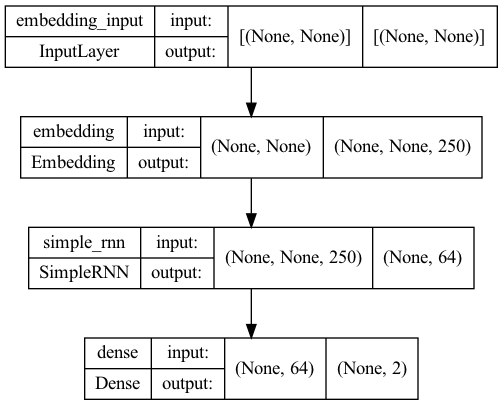

In [30]:
RNN = keras.Sequential(name='RNN')
RNN.add(layers.Embedding(1+len(myWord2Vec.wv.vocab), 250 ))
RNN.add(layers.SimpleRNN(64))
RNN.add(layers.Dense(2, activation='softmax'))
keras.utils.plot_model(RNN, show_shapes=True)

In [4]:
RNN.layers[0].set_weights([embeding_matrix])
RNN.layers[0].trainable=False
RNN.summary()

NameError: name 'RNN' is not defined

In [104]:
RNN.compile(optimizer='Adam', loss=keras.losses.sparse_categorical_crossentropy,
            metrics=['accuracy'])

In [1]:
RNN.fit(x_train ,y_train, epochs = 30)

NameError: name 'RNN' is not defined

In [92]:
# RNN.predict_classes(x_train)
predict_x=RNN.predict(x_train) 
classes_x=np.argmax(predict_x,axis=1)

In [96]:
classes_x[:10]

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [101]:
myWord2Vec.wv.vocab

{'很快': <gensim.models.keyedvectors.Vocab at 0x13aa01eb0>,
 '，': <gensim.models.keyedvectors.Vocab at 0x11d0276a0>,
 '好吃': <gensim.models.keyedvectors.Vocab at 0x13a68f490>,
 '味道': <gensim.models.keyedvectors.Vocab at 0x13a68fc10>,
 '足': <gensim.models.keyedvectors.Vocab at 0x13a62f370>,
 '量': <gensim.models.keyedvectors.Vocab at 0x13aa29730>,
 '大': <gensim.models.keyedvectors.Vocab at 0x13aa29d90>,
 '没有': <gensim.models.keyedvectors.Vocab at 0x13aa29b80>,
 '送水': <gensim.models.keyedvectors.Vocab at 0x11ce38310>,
 '非常': <gensim.models.keyedvectors.Vocab at 0x11ce38820>,
 '快': <gensim.models.keyedvectors.Vocab at 0x13aa1eb80>,
 '态度': <gensim.models.keyedvectors.Vocab at 0x13aa1ebb0>,
 '好': <gensim.models.keyedvectors.Vocab at 0x13aa1ee20>,
 '。': <gensim.models.keyedvectors.Vocab at 0x13aa1e730>,
 '方便': <gensim.models.keyedvectors.Vocab at 0x13aa1e820>,
 '快捷': <gensim.models.keyedvectors.Vocab at 0x13aa1e4f0>,
 '可口': <gensim.models.keyedvectors.Vocab at 0x13aa1e4c0>,
 '递给': <gensim.models

In [93]:
myWord2Vec.wv.similar_by_word('快')

[('超快', 0.7793969511985779),
 ('巨慢', 0.7550851702690125),
 ('依然', 0.7534446120262146),
 ('特快', 0.7513495087623596),
 ('热乎乎', 0.7500733733177185),
 ('近', 0.7493963837623596),
 ('神速', 0.7479171752929688),
 ('巨快', 0.745095431804657),
 ('很慢', 0.7450035214424133),
 ('极慢', 0.7426501512527466)]